In [117]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

import pylab as pl

sns.set_style("whitegrid")
sns.set_context("poster")

import warnings
import random
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 6)

In [225]:
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 10-fold CV: %.3f' %cv)

In [37]:
#dataset from https://www.kaggle.com/pronto/cycle-share-dataset
trip = pd.read_csv("cycle-share-dataset/trip.csv", skiprows=50794, 
                   names = ["trip_id", "starttime", "stoptime", "bikeid","tripduration","from_station_name","to_station_name","from_station_id","to_station_id","usertype","gender","birthyear"])

In [38]:
#Time series test
trip['starttime'] = pd.to_datetime(trip['starttime'])
trip.index = trip['starttime']
#bick usage group by day
trip.resample('D').size()
rides = trip.resample('D').size()

In [39]:
weather = pd.read_csv("cycle-share-dataset/weather.csv")
weather = weather[pd.notnull(weather['Mean_Temperature_F'])]

In [40]:
weather.shape

(688, 21)

In [253]:
#Weather time series format 
weather['Date'] = pd.to_datetime(weather['Date'])
weather.index = weather['Date']
weather['rides'] = trip.resample('D').size()
weather.columns

Index(['Date', 'Max_Temperature_F', 'Mean_Temperature_F', 'Min_TemperatureF',
       'Max_Dew_Point_F', 'MeanDew_Point_F', 'Min_Dewpoint_F', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_Pressure_In',
       'Mean_Sea_Level_Pressure_In', 'Min_Sea_Level_Pressure_In',
       'Max_Visibility_Miles', 'Mean_Visibility_Miles', 'Min_Visibility_Miles',
       'Max_Wind_Speed_MPH', 'Mean_Wind_Speed_MPH', 'Max_Gust_Speed_MPH',
       'Precipitation_In', 'Events', 'rides'],
      dtype='object')

In [254]:
X = weather[["Mean_Temperature_F",'Mean_Humidity','Max_Wind_Speed_MPH', 'Precipitation_In']]
y = np.array(weather[["rides"]])

In [255]:
X.shape

(688, 4)

In [256]:
X = np.array([np.concatenate((v,[1])) for v in np.array(X)])
#X = X[:]

In [257]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [258]:
# Compute RMSE on all data
y_pred = linreg.predict(X)
no_rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
no_rmse

83.853983491148497

In [259]:
y_m=np.mean(y)
y_m

342.95784883720933

In [260]:
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
rmse

83.853983491148497

In [261]:
rmse/y_m

0.24450230188769115

In [262]:
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
y_null[0:33]

array([[ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478],
       [ 349.88043478]])

In [263]:
y_null_rmse =np.sqrt(metrics.mean_squared_error(y_test, y_null))
y_null_rmse

158.72306406593097

In [264]:
y_null_rmse/y_test.mean()

0.45364944217172481

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

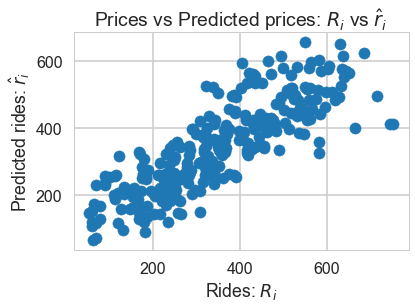

In [266]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Rides: $R_i$")
plt.ylabel("Predicted rides: $\hat{r}_i$")
plt.title("Prices vs Predicted prices: $R_i$ vs $\hat{r}_i$")

In [267]:
np.median(y_test)

336.5

In [268]:
y_m=np.mean(y_test)

In [269]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse.round(3)

88.418999999999997

In [270]:
rmse/y_m

0.2527118391901107

In [271]:
np.isscalar(y_test)

False

In [272]:
# RMSE using 5-fold cross-validation
kf = KFold(len(X), n_folds=10)

In [273]:
scores = []
for train, test in kf:
    linreg.fit(X[train],y[train])
    scores.append(np.sqrt(metrics.mean_squared_error(y[test], linreg.predict(X[test]))))
scores

[80.612009114315214,
 69.11074872766342,
 121.29077537758934,
 101.72696152410685,
 85.614137779405922,
 80.266141824124702,
 66.642886649478626,
 58.666958186381422,
 109.02308046467337,
 87.666393076211833]

In [274]:
np.mean(scores)

86.062009272395088

In [275]:
show_stats('Simple Linear Regression',no_rmse ,np.mean(scores))

Method: Simple Linear Regression
RMSE on no CV training: 83.854
RMSE on 10-fold CV: 86.062


In [276]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

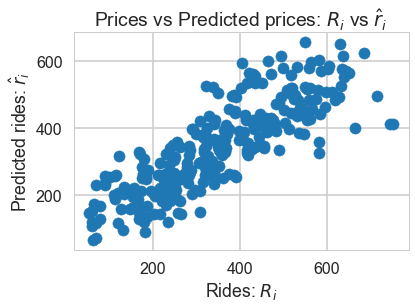

In [277]:
plt.scatter(y_test, y_pred)
plt.xlabel("Rides: $R_i$")
plt.ylabel("Predicted rides: $\hat{r}_i$")
plt.title("Prices vs Predicted prices: $R_i$ vs $\hat{r}_i$")

In [278]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

88.418928170548625

In [279]:
# RMSE using 10-fold cross-validation
kf = KFold(len(X), n_folds=10)
scores = []
for train, test in kf:
    linreg.fit(X[train],y[train])
    scores.append(np.sqrt(metrics.mean_squared_error(y[test], linreg.predict(X[test]))))
scores

[80.612009114315214,
 69.11074872766342,
 121.29077537758934,
 101.72696152410685,
 85.614137779405922,
 80.266141824124702,
 66.642886649478626,
 58.666958186381422,
 109.02308046467337,
 87.666393076211833]

In [280]:
show_stats('Ridge Regression',no_rmse ,np.mean(scores))

Method: Ridge Regression
RMSE on no CV training: 83.854
RMSE on 10-fold CV: 86.062
